In [1]:
%cd Documents/homework/sds353/

/Users/scott/Documents/homework/sds353


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
nampd = pd.read_csv('data/nampd.csv')
nampd.head()

,species,ln_mass,ln_old_mass,first_appear_Mya,last_appear_Mya
0,Aaptoryctes_ivyi,4.835,NaN,57.2,56.8
1,Abelmoschomys_simpsoni,2.774,NaN,9.9,9.9
2,Absarokius_abbotti,6.023,5.957,53.7,50.7
3,Absarokius_australis,6.104,5.957,49.9,49.8
4,Absarokius_gazini,5.735,5.957,53.5,53.4


In [4]:
nampd_na = nampd[nampd['ln_old_mass'].notnull()]
x = nampd_na['ln_old_mass'].values
y = nampd_na['ln_mass'].values

In [5]:
# slope, intercept, r_value, p_value, std_err
lm_fit = stats.linregress(x,y)
slope, intercept = lm_fit[0], lm_fit[1]
print('Slope: %f\nIntercept: %f' % (slope,intercept))

Slope: 0.995219
Intercept: 0.141146


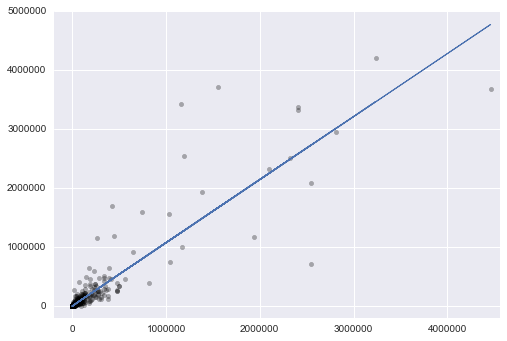

In [6]:
yhat = [slope * xi + intercept for xi in x]

x_exp = np.exp(x)
y_exp = np.exp(y)

fig, ax = plt.subplots()
ax.set_xlim([-2e5, np.max(x_exp) + 1e5])
ax.set_ylim([-2e5, np.max(y_exp) + 8e5])

ax.scatter(np.exp(x), np.exp(y), color='black', alpha=0.3)
ax.plot(np.exp(x), np.exp(yhat), linewidth=1)

plt.show()

Best score: (550, 0.5040167780933853)


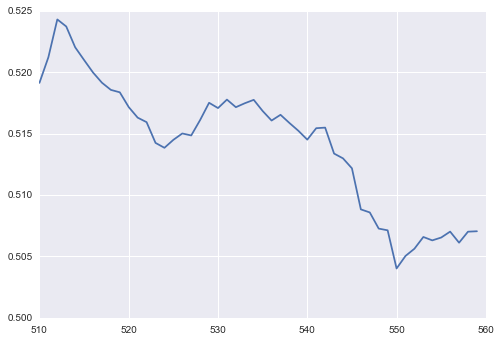

In [57]:
from sklearn.model_selection import KFold
from scipy.interpolate import UnivariateSpline

# sort xs
data = nampd_na.sort_values(by='ln_old_mass')[['ln_old_mass', 'ln_mass']].values
xs = data[:,0]
ys = data[:,1]

scores = []
kf = KFold(n_splits=len(y), shuffle=True, random_state=0)
for s in range(510, 560):
    score = 0
    for train_idx, test_idx in kf.split(xs):
        x_train, x_test = xs[train_idx], xs[test_idx]
        y_train, y_test = ys[train_idx], ys[test_idx]

        spl = UnivariateSpline(x_train, y_train, s=s)
        score += np.mean((y_test - spl(x_test))**2)
    score /= kf.get_n_splits()
    scores.append((s, score))
    
print('Best score: %s' % (sorted(scores, key=lambda x: x[1])[0],))

plt.plot([x[0] for x in scores], [x[1] for x in scores])

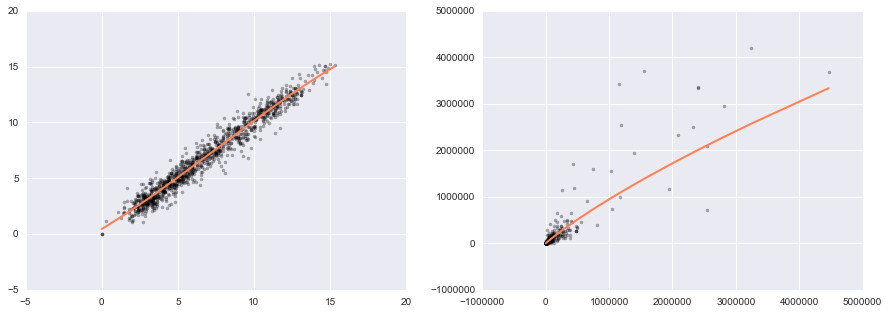

In [63]:
spl = UnivariateSpline(xs, ys)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(xs, ys, color='black', alpha=0.3, s=10)
ax1.plot(xs, spl(xs), lw=2, color='coral')

ax2.scatter(np.exp(xs), np.exp(ys), color='black', alpha=0.3, s=10)
ax2.plot(np.exp(xs), np.exp(spl(xs)), lw=2, color='coral')

plt.show()

In [16]:
spl.get_residual()**2

312159.19760568236

In [52]:
scores

[(500, 6727.055935115246),
 (501, 6727.055935115246),
 (502, 6727.055935115246),
 (503, 6727.055935115246),
 (504, 6727.055935115246),
 (505, 6727.055935115246),
 (506, 6727.055935115246),
 (507, 6727.055935115246),
 (508, 6727.055935115246),
 (509, 6727.055935115246),
 (510, 6727.055935115246),
 (511, 6727.055935115246),
 (512, 6727.055935115246),
 (513, 6727.055935115246),
 (514, 6727.055935115246),
 (515, 6727.055935115246),
 (516, 6727.055935115246),
 (517, 6727.055935115246),
 (518, 6727.055935115246),
 (519, 6727.055935115246),
 (520, 6727.055935115246),
 (521, 6727.055935115246),
 (522, 6727.055935115246),
 (523, 6727.055935115246),
 (524, 6727.055935115246),
 (525, 6727.055935115246),
 (526, 6727.055935115246),
 (527, 6727.055935115246),
 (528, 6727.055935115246),
 (529, 6727.055935115246),
 (530, 6727.055935115246),
 (531, 6727.055935115246),
 (532, 6727.055935115246),
 (533, 6727.055935115246),
 (534, 6727.055935115246),
 (535, 6727.055935115246),
 (536, 6727.055935115246),
 